In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
file_source = "/Users/dorahborgi/Documents/GitHub/ada-2024-project-theadavengers/"

movie_dataset = pd.read_csv(file_source + 'Prediction csv files/movie_feminism_dataset_gpt2_prediction.csv')

In [72]:
oscars_df = pd.read_csv(file_source + 'Prediction csv files/oscars_df.csv')
columns_to_keep = ['Film', 'Award', 'IMDB Rating']
oscars_df = oscars_df[columns_to_keep]

In [73]:
movie_dataset.columns

Index(['Unnamed: 0', 'Wikipedia movie ID', 'Summaries', 'Freebase movie ID',
       'Movie name', 'Movie release date', 'Movie box office revenue',
       'Movie runtime', 'Movie languages (Freebase ID:name tuples)',
       'Movie countries (Freebase ID:name tuples)',
       'Movie genres (Freebase ID:name tuples)', 'Year',
       'Country dictionnaire', 'Genre dictionnaire', 'Language dictionnaire',
       'feminism'],
      dtype='object')

In [74]:
genres_grouped = {
    "Action and Adventure": [
        'Action', 'Action Thrillers', 'Action/Adventure', 'Adventure', 'Action Thriller', 'Adventure Comedy', 'Superhero', 
        'Superhero movie', 'War film', 'War effort', 'Sci-Fi Adventure', 'Sword and sorcery', 'Sword and sorcery films', 
        'Martial Arts Film', 'Heist', 'Combat Films', 'Western', 'B-Western', 'Spaghetti Western', 'Crime Thriller', 
        'Detective fiction', 'Spy', 'Spy Film', 'Action Thrillers'
    ],
    "Drama": [
        'Drama', 'Period piece', 'Family Drama', 'Romantic drama', 'Tragicomedy', 'Courtroom Drama', 
        'Political drama', 'Medical fiction', 'Crime Drama', 'Historical drama', 'Legal drama', 'Political satire', 
        'Inspirational Drama', 'Courtroom Comedy', 'Historical Epic', 'Family-Oriented Adventure', 
        'Social problem film', 'Nature', 'Domestic Comedy', 'Juvenile Delinquency Film', 'Coming of age', 'Childhood Drama',
        'Family & Personal Relationships', 'Americana', 'Roadshow theatrical release', 'Culture & Society', 'Interpersonal Relationships',
        'Teen', 'Addiction Drama',  'Marriage Drama', 'Slice of life story', 
    ],
    "Comedy": [
        'Comedy', 'Screwball comedy', 'Satire', 'Black comedy', 'Romantic comedy', 'Comedy-drama', 
        'Slapstick', 'Comedy Thriller', 'Domestic Comedy', 'Parody', 'Dark Comedy', 'Stand-up comedy', 
        'Slapstick Comedy', 'Comedy film', 'Black-and-white Comedy', 'Comedy of manners', 'Ensemble Film',
        'Comedy of Errors', 'Humour', 'Comedy Western', 'Workplace Comedy', 'Action Comedy', 'Ealing Comedies', 'Mockumentary'
    ],
    "Horror and Thriller": [
        'Horror', 'Thriller', 'Slasher', 'Psychological thriller', 'Zombie Film', 'Supernatural', 
        'Monster movie', 'Crime Thriller', 'Horror Comedy', 'Gothic Film', 'Horror Mystery', 'Psychological horror', 
        'Slasher film', 'Crime Fiction', 'Psycho-biddy', 'Vampire movies', 'Erotic thriller', 'Natural horror films',
        'Comedy horror', 'Costume Horror'
    ],
    "Romance": [
        'Romance Film', 'Romantic fantasy', 'Romantic drama', 'Romantic comedy', 'Love story', 
        'Romantic thriller', 'Fantasy Romance', 'Sex comedy', 'Christmas movie'
    ],
    "Sci-Fi and Fantasy": [
        'Science Fiction', 'Fantasy', 'Fantasy Comedy', 'Sci-Fi Horror', 'Space western', 'Cyberpunk', 'Dystopia', 
        'Alien Film', 'Supernatural', 'Time travel', 'Apocalyptic and post-apocalyptic fiction', 'Steampunk',
        'Fantasy Adventure', 'Neo-noir', 'Surrealism', 'Sci-Fi Thriller', 'Sci Fi Pictures original films'
    ],
    "Family and Kids": [
        'Family Film', 'Animated', 'Children\'s/Family', 'Family-Oriented Adventure', 'Animation', 'Children\'s Fantasy',
        'Animated Musical', 'Family Movie', 'Fairy tale', "Children's", 'Animated cartoon', 'School story', "Children's Issues", 
        "Children's Entertainment", "Children's Film",  'Family-Oriented films', 'Family',
        "Children's Issue"
    ],
    "Documentary": [
        'Documentary', 'Docudrama', 'Biography', 'Educational', 'Music', 'Travel', 'Social issues', 
        'Politics & Society', 'Environmental Science', 'Business', 'Political cinema', 'Historical Documentaries',
        'Health & Fitness', 'World History'
    ],
    "Indie": [
        'Indie', 'Experimental film', 'Avant-garde', 'Art film', 'Independent film', 'Mumblecore', 'Film-Opera', 'Short Film',
        'Experimental Films', 'Psychological Films'
    ],
    "History": [
        'History', 'Historical fiction', 'Biographical film', 'Historical epic', 'Costume drama', 'Historical drama',
        'Biographical film', 'War and Politics', 'WWII Films', 'Political cinema', 'Period Horror'
    ],
    "Cult": [
        'Cult','B-movie','Grindhouse','Blaxploitation','Giallo','Zombie Film','Stoner film','Erotic film','Exploitation film',
        'Pinku eiga', 'Splatter film', 'Gore', 'Erotica', 'Softcore Porn', 'Pornographic movie', 'Hardcore pornography',
        'Gay pornography', 'Gay', 'Gay Interest', 'Erotic Drama', 'Exploitation', 'Glamorized Spy Film', 'Gay Themed'
    ],
    "Crime and Mystery": [
        'Crime Fiction', 'Crime Drama', 'Detective', 'Film noir', 'Mystery', 'Whodunit', 'Crime Comedy', 'Caper story',
        'Legal Drama', 'Crime Thriller', 'Gangster Film', 'Heist', 'Crime', 'Glamorized Spy Film'
    ],
    "Social Issues and Political Films": [
        'Political drama', 'Political satire', 'Political thriller', 'Social issue films', 'Law & Crime', 
        'Gender Issues', 'Political cinema', 'Propaganda film'
    ],
    "Experimental": [
        'Experimental Films', 'Psychological Films', 'Crime Comedy', 'Propaganda Films', 'Sexploitation', 
        'Supernatural Film', 'Detective Fiction', 'Cult Films', 'Anthropology', 'Mondo film', 'Public Domain', 
        'Genre Fiction', 'Bloopers & Candid Camera', 'Screwball comedy', 'Comedy horror'
    ],
    #"Feminist Films": [
    #    'Feminist Film', 'Gender Issues', 'Women in prison films', 'Women’s Studies', 'Feminist cinema', 
    #    'Women in film', 'Feminist documentary', 'Sexual Politics in Film'
    #],
    "Musical":['Musical', 'Bollywood', 'Musical Drama', 'Hip hop movies', 'Jukebox musical','Punk rock',
               'Backstage Musical', 'Instrumental Music', 'Operetta', 'Punk rock'

    ],
    "Miscellaneous Other Genres": [
        'World cinema', 'Black-and-white', 'Biopic [feature]', 'Film adaptation', 
        'Musical comedy', 'Beach Film', 'Silent film', 'Melodrama', 'Television movie', 
        'Sports', 'LGBT', 'Filipino', 'Filipino Movies', 'Epic', 'Anthology', 'Japanese Movies', 
        'Haunted House Film', 'Tamil cinema', 'The Netherlands in World War II', 'Suspense', 'Erotic comedy', 
        'Tollywood', 'New Hollywood', 'Erotic Drama', 'Erotica', 'Chinese Movies', 
        'Fantasy Drama', 'Pre-Code', 'Neo-noir', 'Buddy film', 'Kitchen sink realism', 'Media Satire', 
        'Computer Animation', 'Christian film', 'Creature Film', 'Remake'
        'Road movie', 'Boxing', 'Stop motion', 'Holiday Film', 'Animal Picture', 'Feature film', 
        'Dogme 95', 'Gross out', 'Road-Horror', 'Disaster', 
        'Natural disaster', 'Anime', 'Chase Movie', 'Escape Film', 'Dance', 
        'Religious Film', 'Samurai cinema', 'Tragedy', 'Monster', 
        'Absurdism', 'British Empire Film', 'Costume Adventure', 'Biker Film', 'Film à clef', 
        'Horse racing', 'Wuxia', 'Heavenly Comedy', 'Cavalry Film', 'Anti-war', 
        'Doomsday film', 'Swashbuckler films', 'Comedy Western', 'Revisionist Western','Archaeology', 'Albino bias', 'Pornography', 'Science fiction Western', 'Hybrid Western', 
        'Exploitation', 'British New Wave', 'Foreign legion', 'Illnesses & Disabilities', 
        'Coming-of-age film', 'Heaven-Can-Wait Fantasies', 'Race movie', 'Movie serial', 'Indian Western', 
        'Bengali Cinema', 'News', 'Czechoslovak New Wave', 'Sponsored film', 'Sword and Sandal', 'Mythological Fantasy', 
        'Roadshow/Carny', 'Fictional film', 'Filmed Play', 'Z movie', 'Parkour in popular culture', 'Essay Film', 
        'Latino', 'Animals', 'Media Studies', 'Prison', 'Goat gland', 'Future noir', 'Auto racing', 'Fan film', 
        'Early Black Cinema', 'Existentialism', 'Airplanes and airports',
        'Revisionist Western', 'Archaeology', 'Albino bias', 'Pornography', 'Gay pornography', 
        'Science fiction Western', 'Hybrid Western', 'Exploitation', 'British New Wave', 'Foreign legion', 
        'Illnesses & Disabilities', 'Coming-of-age film', 'Heaven-Can-Wait Fantasies', 'Race movie', 'Movie serial', 
        'Indian Western', 'Bengali Cinema', 'Gross-out film', 'Adult', 'Remake', 'Road movie', 'Rockumentary', 'Anti-war film',
       'Hagiography', 'Female buddy film', 'Language & Literature',
       'Malayalam Cinema', 'Extreme Sports', 'Jungle Film', 'Film',
       'Film & Television History', 'Prison film', 'Epic Western',
       'Beach Party film', 'Werewolf fiction', 'Archives and records',
       'Acid western', 'Outlaw', 'Northern', 'Supermarionation',
       'Demonic child', 'Kafkaesque', 'Clay animation', 'Concert film',
       'Finance & Investing', 'Bruceploitation', 'Graphic & Applied Arts',
       'Live action', 'Computers', 'Plague', 'Education',
       'Therimin music', 'Libraries and librarians', 'Expressionism',
       'Cold War', 'Point of view shot', 'Buddy cop',
       'Inventions & Innovations', 'Star vehicle', 'New Queer Cinema',
       'Camp', 'Master Criminal Films', 'Comdedy', 'Statutory rape',
       'Alien invasion', 'Journalism', 'Reboot', 'Feminist Film', 'Gender Issues', 'Women in prison films', 'Women’s Studies', 'Feminist cinema', 
        'Women in film', 'Feminist documentary', 'Sexual Politics in Film'
    ]
}


In [75]:
import json

def extract_genres(genre_str):
    try:
        # Convert the genre string (which is in JSON format) to a dictionary
        genre_dict = json.loads(genre_str)
        # Extract genre names from the dictionary (the values)
        genres = list(genre_dict.values())
        return genres
    except Exception as e:
        # In case of an error in parsing, return an empty list or handle the error appropriately
        return []

In [76]:
movie_dataset['genres'] = movie_dataset['Movie genres (Freebase ID:name tuples)'].apply(extract_genres)

In [77]:
import json


# Function to preprocess genre column
def extract_genres(genre_str):
    try:
        # Convert the genre string (which is in JSON format) to a dictionary
        genre_dict = json.loads(genre_str)
        # Extract genre names from the dictionary (the values)
        genres = list(genre_dict.values())
        return genres
    except Exception as e:
        # In case of an error in parsing, return an empty list or handle the error appropriately
        return []

genre_to_group = {}
for group, genres_list in genres_grouped.items():
    for genre in genres_list:
        genre_to_group[genre] = group

def categorize_genre(genre):
    return genre_to_group.get(genre, 'Other')

movie_dataset_explode_genre = movie_dataset.explode('genres')

movie_dataset_explode_genre['genre_general'] = movie_dataset_explode_genre['genres'].apply(categorize_genre)


In [78]:
movie_dataset_explode_genre['Period'] = pd.cut(
    movie_dataset['Year'], 
    bins=[1940, 1960, 1980, 2010], 
    labels=['1940-1960', '1960-1980', '1980-2010'],
    right=False
)

In [79]:
movie_dataset_per_genre_period = movie_dataset_explode_genre.groupby(['Period', 'genre_general']).agg(
    movies_feminist = ('feminism', 'sum'),
    nb_total = ('Wikipedia movie ID', 'count')
)

/var/folders/dl/y_0dp4yd3sd1cf5mnxcnpt100000gn/T/ipykernel_35751/1786405178.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [80]:
movie_dataset_per_genre_period['percentage_feminism']= movie_dataset_per_genre_period['movies_feminist']/movie_dataset_per_genre_period['nb_total']

In [81]:
display(movie_dataset_per_genre_period)

movies_feminist  nb_total  \
Period    genre_general                                                  
1940-1960 Action and Adventure                           681      2252   
          Comedy                                         816      1768   
          Crime and Mystery                              741      1714   
          Cult                                            21        62   
          Documentary                                     68       138   
          Drama                                         1265      2361   
          Experimental                                    43        91   
          Family and Kids                                228       985   
          History                                        120       231   
          Horror and Thriller                            374       913   
          Indie                                          211       741   
          Miscellaneous Other Genres                    1372      2823   
          Musical                                        313       466   
          Other                                           22        45   
          Romance                                        875      1182   
          Sci-Fi and Fantasy                             121       406   
          Social Issues and Political Films               46       111   
1960-1980 Action and Adventure                          1043      3101   
          Comedy                                        1100      2281   
          Crime and Mystery                              611      1382   
          Cult                                           289       542   
          Documentary                                     73       172   
          Drama                                         1704      3200   
          Experimental                                    73       125   
          Family and Kids                                288       817   
          History                                        102       233   
          Horror and Thriller                            945      1876   
          Indie                                          273       666   
          Miscellaneous Other Genres                    1667      3315   
          Musical                                        360       593   
          Other                                           37        64   
          Romance                                        939      1351   
          Sci-Fi and Fantasy                             353       809   
          Social Issues and Political Films               59       150   
1980-2010 Action and Adventure                          3249      9731   
          Comedy                                        5342     10235   
          Crime and Mystery                             2319      5534   
          Cult                                           882      1694   
          Documentary                                    996      1770   
          Drama                                         8428     14652   
          Experimental                                   145       308   
          Family and Kids                               1841      4110   
          History                                        504       959   
          Horror and Thriller                           4203      8744   
          Indie                                         2111      3848   
          Miscellaneous Other Genres                    6749     12716   
          Musical                                       1160      2092   
          Other                                          104       209   
          Romance                                       5165      7386   
          Sci-Fi and Fantasy                            1688      3928   
          Social Issues and Political Films              331       714   

                                             percentage_feminism  
Period    genre_general                                

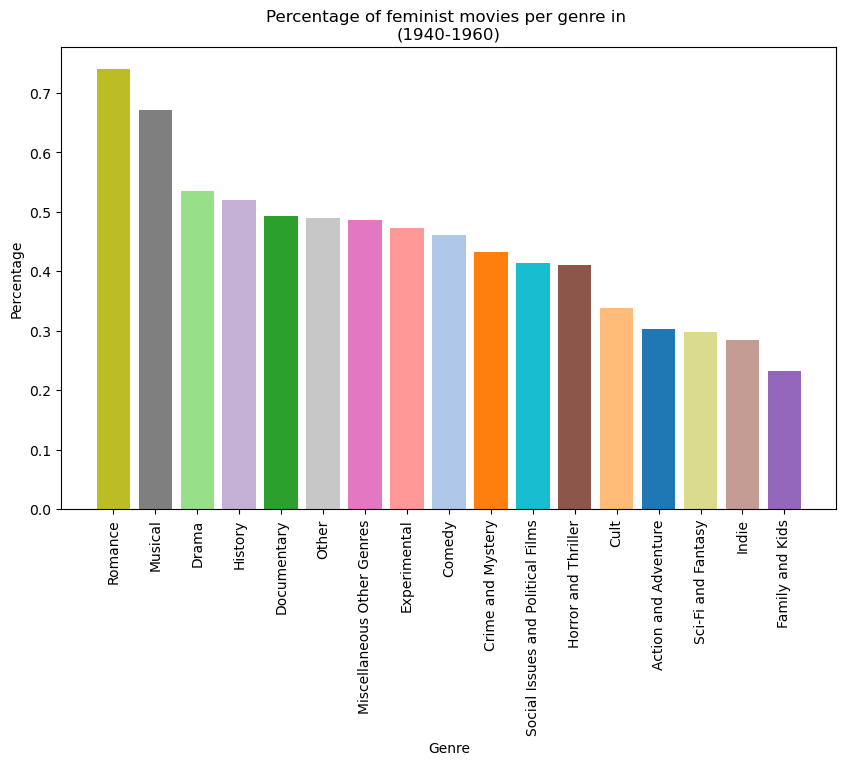

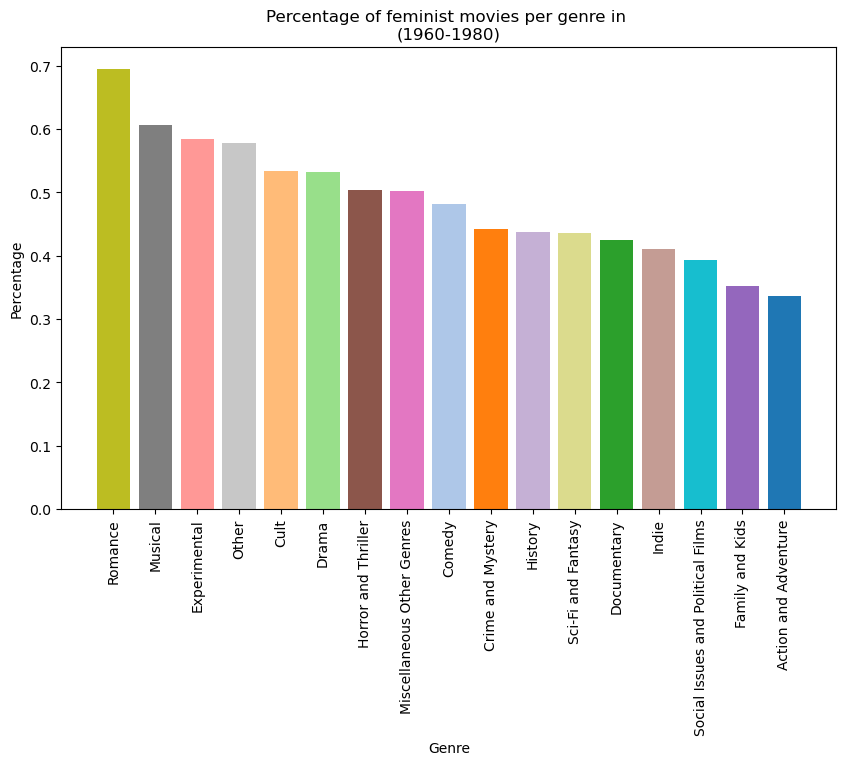

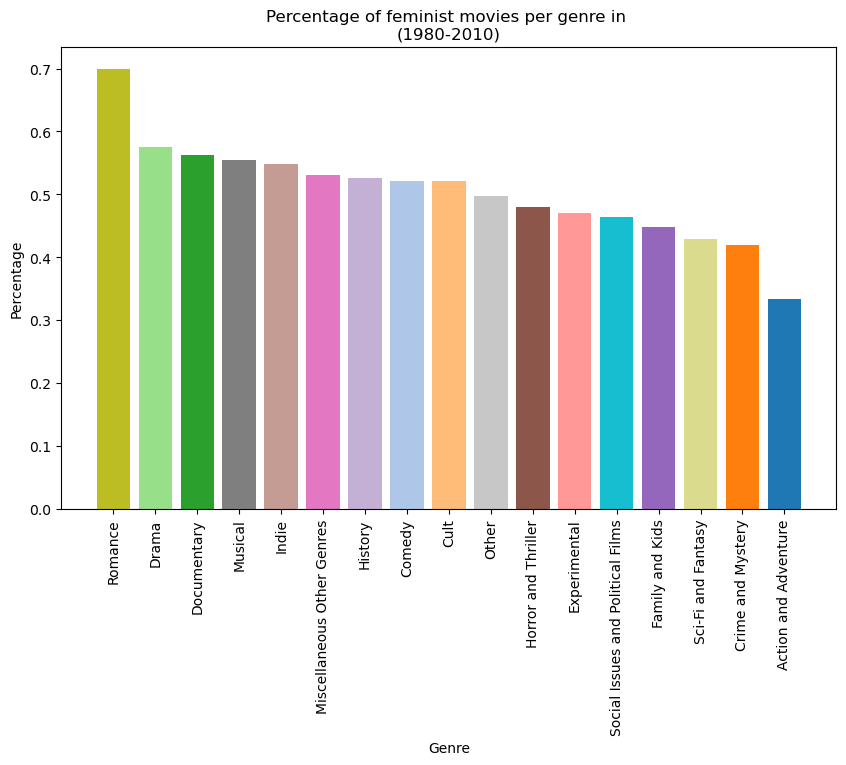

In [82]:
periods = ['1940-1960', '1960-1980', '1980-2010']

genres = movie_dataset_per_genre_period.index.get_level_values('genre_general').unique()
genre_colors = {genre: plt.cm.tab20(i / len(genres)) for i, genre in enumerate(genres)}

def plot_period_data(period):
    period_data = movie_dataset_per_genre_period.loc[period]
    
    period_data = period_data.sort_values(by='percentage_feminism', ascending=False)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        period_data.index, 
        period_data['percentage_feminism'], 
        color=[genre_colors[genre] for genre in period_data.index]
    )
    plt.title(f'Percentage of feminist movies per genre in \n({period})')
    plt.xticks(rotation=90)  
    plt.ylabel('Percentage')
    plt.xlabel('Genre')
    plt.show()

for period in periods:
    plot_period_data(period)

In [83]:
genres = movie_dataset_per_genre_period.index.get_level_values('genre_general').unique()
genre_colors = {genre: px.colors.qualitative.Set3[i % len(px.colors.qualitative.Set3)] 
                for i, genre in enumerate(genres)}

def save_period_plot_html(period):
    period_data = movie_dataset_per_genre_period.loc[period].reset_index()
    
    fig = px.bar(
        period_data,
        x='genre_general',
        y='percentage_feminism',
        title=f'Percentage of feminist movies per genre in \n({period})',
        color='genre_general',
        color_discrete_map=genre_colors
    )
    
    fig.update_layout(
        xaxis_title="Genre",
        yaxis_title="Percentage",
        xaxis_tickangle=90,
        template="plotly_white"
    )

    file_name = f"percentage_feminism_{period.replace('-', '_')}.html"
    pio.write_html(fig, file=file_name)

for period in periods:
    save_period_plot_html(period)

# Oscars and nominees

In [84]:
oscars_percentage = pd.merge(movie_dataset, oscars_df, left_on = 'Movie name', right_on = 'Film', how='inner')

In [85]:
oscars_percentage.columns

Index(['Unnamed: 0', 'Wikipedia movie ID', 'Summaries', 'Freebase movie ID',
       'Movie name', 'Movie release date', 'Movie box office revenue',
       'Movie runtime', 'Movie languages (Freebase ID:name tuples)',
       'Movie countries (Freebase ID:name tuples)',
       'Movie genres (Freebase ID:name tuples)', 'Year',
       'Country dictionnaire', 'Genre dictionnaire', 'Language dictionnaire',
       'feminism', 'genres', 'Film', 'Award', 'IMDB Rating'],
      dtype='object')

In [86]:
columns_to_keep = ['Movie name', 'feminism', 'Award']
oscars_percentage = oscars_percentage[columns_to_keep]

In [87]:
result_oscar = oscars_percentage.groupby('Award').agg(
    movies_feminist = ('feminism', 'sum'),
    nb_total = ('Movie name', 'count')
    )

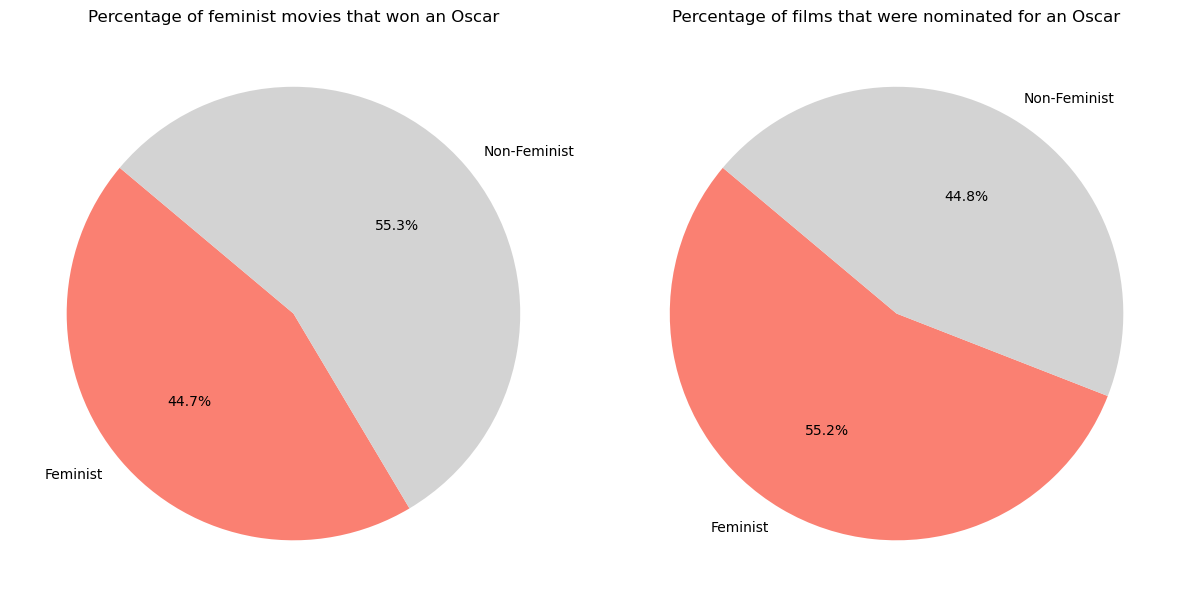

In [88]:
colors = ['salmon', 'lightgrey']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    [result_oscar.loc['Winner', 'movies_feminist'], 
     result_oscar.loc['Winner', 'nb_total'] - result_oscar.loc['Winner', 'movies_feminist']],
    labels=['Feminist', 'Non-Feminist'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)
axes[0].set_title("Percentage of feminist movies that won an Oscar")

axes[1].pie(
    [result_oscar.loc['Nominee', 'movies_feminist'], 
     result_oscar.loc['Nominee', 'nb_total'] - result_oscar.loc['Nominee', 'movies_feminist']],
    labels=['Feminist', 'Non-Feminist'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)
axes[1].set_title("Percentage of films that were nominated for an Oscar")

plt.tight_layout()
plt.show()

In [89]:
import plotly.graph_objects as go

labels = ['Feminist', 'Non-Feminist']
colors = ['salmon', 'lightgrey']

winner_feminist = result_oscar.loc['Winner', 'movies_feminist']
winner_non_feminist = result_oscar.loc['Winner', 'nb_total'] - winner_feminist

nominee_feminist = result_oscar.loc['Nominee', 'movies_feminist']
nominee_non_feminist = result_oscar.loc['Nominee', 'nb_total'] - nominee_feminist

fig_combined = go.Figure()

fig_combined.add_trace(go.Pie(
    labels=labels,
    values=[winner_feminist, winner_non_feminist],
    marker=dict(colors=colors),
    textinfo='percent',
    hole=0.3,
    name='Winner'
))

fig_combined.add_trace(go.Pie(
    labels=labels,
    values=[nominee_feminist, nominee_non_feminist],
    marker=dict(colors=colors),
    textinfo='percent',
    hole=0.3,
    name='Nominee',
    domain=dict(x=[0.55, 1])
))

fig_combined.update_layout(
    title="Feminist Movies in Oscar Winners and Nominees",
    annotations=[
        dict(text='Winner', x=0.25, y=0.5, font_size=20, showarrow=False),
        dict(text='Nominee', x=0.75, y=0.5, font_size=20, showarrow=False)
    ]
)

fig_combined.write_html('combined_oscar_feminist_pie_charts.html')

In [ ]:
import ast

movie_dataset['Country dictionnaire'] = movie_dataset['Movie countries (Freebase ID:name tuples)'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
)

movie_dataset_explode_country = movie_dataset.explode('Country dictionnaire')

movies_per_country = movie_dataset_explode_country.groupby(['Country dictionnaire', 'Year']).agg(
    total_movies=('Wikipedia movie ID', 'count'),
    feminist_movies=('feminism', 'sum')
).reset_index()

In [ ]:
films_per_country = movie_dataset_explode_country.groupby('Country dictionnaire').size().reset_index(name='total_movies')
top_5_countries = films_per_country.sort_values(by='total_movies', ascending=False).head(5)
top_countries_name = ['United States of America', "India", 'United Kingdom', 'France', 'Italy']

In [92]:
movies_per_country['percentage'] = movies_per_country['feminist_movies']/movies_per_country['total_movies']

In [93]:
movies_per_country = movies_per_country[(movies_per_country['Year'] >= 1960) & (movies_per_country['Year'] < 2008)]

In [ ]:
df = movies_per_country[movies_per_country['Country dictionnaire'].isin(top_5_countries['Country dictionnaire'])]
country_labels = dict(zip(top_5_countries['Country dictionnaire'], top_countries_name))
fig = go.Figure()

for country_code, country_label in country_labels.items():
    country_data = df[df['Country dictionnaire'] == country_code]
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['percentage'],
        mode='lines',
        name=country_label,
        hovertemplate=f"<b>{country_label}</b><br>Year: {{x}}<br>Percentage: {{y:.2f}}%"  # Affichage interactif
    ))


fig.update_layout(
    title="Percentage of Feminist Movies in Top 5 Movie-Producing Countries (From 1960)",
    xaxis_title="Year",
    yaxis_title="Percentage",
    legend_title="Country",
    template="plotly_white",
    hovermode="x unified"
)

fig.write_html("feminist_movies_by_country.html")

fig.show()